### Downloading the libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Reading the raw data from Evergreen

In [41]:
df = pd.read_excel('/Users/misharimer/Downloads/Collection_Data_Analyst_Tech Task_Python_Misha R.xlsx')


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   sending_date                       1000 non-null   datetime64[ns]
 1   loan_id                            1000 non-null   float64       
 2   days_overdue_SD                    1000 non-null   float64       
 3   outstanding_capital_SD             1000 non-null   float64       
 4   agency                             1000 non-null   object        
 5   report_date_1                      1000 non-null   datetime64[ns]
 6   outstanding_capital_report_date_1  1000 non-null   float64       
 7   report_date_2                      1000 non-null   datetime64[ns]
 8   outstanding_capital_report_date_2  1000 non-null   float64       
 9   report_date                        1000 non-null   datetime64[ns]
 10  outstanding_capital_report_date_3  10

### Everything is fine, we have the same initial data as in original Excel from Evergreen


In [43]:
df['money_returned_d1'] = df['outstanding_capital_SD'] - df['outstanding_capital_report_date_1']
df['money_returned_d2'] = df['outstanding_capital_SD'] - df['outstanding_capital_report_date_2']
df['money_returned_d3'] = df['outstanding_capital_SD'] - df['outstanding_capital_report_date_3']
df['return_rate_on_d1/d0'] = round(((df['outstanding_capital_SD'] - df['outstanding_capital_report_date_1'])/(df['outstanding_capital_SD'])*100),1)
df['return_rate_on_d2/d0'] = round(((df['outstanding_capital_SD'] - df['outstanding_capital_report_date_2'])/(df['outstanding_capital_SD'])*100),1)
df['return_rate_on_d3/d0'] = round(((df['outstanding_capital_SD'] - df['outstanding_capital_report_date_3'])/(df['outstanding_capital_SD'])*100),1)


### Enriched the data with calculation of money returned and return rate

In [44]:
df.head(5)

,sending_date,loan_id,days_overdue_SD,outstanding_capital_SD,agency,report_date_1,outstanding_capital_report_date_1,report_date_2,outstanding_capital_report_date_2,report_date,outstanding_capital_report_date_3,money_returned_d1,money_returned_d2,money_returned_d3,return_rate_on_d1/d0,return_rate_on_d2/d0,return_rate_on_d3/d0
0,2022-01-01,1.0,26.0,421.0,Fox Collection,2022-02-01,223.0,2022-03-01,191.0,2022-04-01,114.0,198.0,230.0,307.0,47.0,54.6,72.9
1,2022-01-01,2.0,7.0,260.0,Fox Collection,2022-02-01,210.0,2022-03-01,123.0,2022-04-01,100.0,50.0,137.0,160.0,19.2,52.7,61.5
2,2022-01-01,3.0,5.0,96.0,Fox Collection,2022-02-01,45.0,2022-03-01,0.0,2022-04-01,0.0,51.0,96.0,96.0,53.1,100.0,100.0
3,2022-01-01,4.0,5.0,406.0,Fox Collection,2022-02-01,243.0,2022-03-01,128.0,2022-04-01,90.0,163.0,278.0,316.0,40.1,68.5,77.8
4,2022-01-01,5.0,3.0,148.0,Fox Collection,2022-02-01,47.0,2022-03-01,31.0,2022-04-01,24.0,101.0,117.0,124.0,68.2,79.1,83.8


In [45]:
df_grouped = df.groupby('agency')[['outstanding_capital_SD','money_returned_d1','money_returned_d2','money_returned_d3']].sum()


In [46]:
df_grouped['return_rate_d1'] = round((df_grouped['money_returned_d1']/df_grouped['outstanding_capital_SD']*100),1)
df_grouped['return_rate_d2'] = round((df_grouped['money_returned_d2']/df_grouped['outstanding_capital_SD']*100),1)
df_grouped['return_rate_d3'] = round((df_grouped['money_returned_d3']/df_grouped['outstanding_capital_SD']*100),1)

In [47]:
df_grouped.sort_values(by = 'return_rate_d3', ascending = False)

,outstanding_capital_SD,money_returned_d1,money_returned_d2,money_returned_d3,return_rate_d1,return_rate_d2,return_rate_d3
agency,,,,,,,
Liquid Collection,46197.0,11645.0,18467.0,21203.0,25.2,40.0,45.9
Fox Collection,59568.0,12029.0,19396.0,23657.0,20.2,32.6,39.7
Otacon Finance Service,45744.0,10230.0,15344.0,18136.0,22.4,33.5,39.6
Snake Finance,104501.0,20444.0,33383.0,40517.0,19.6,31.9,38.8
Marshal Collection Agency,41513.0,2159.0,4262.0,5277.0,5.2,10.3,12.7


### So here we have the same aggregation table as in Excel investigation. The conclusion as well the same: liquied is the most efficient agency (highest return rate).

Calculation of quantiles in order to set the boundaries level for further categorization. Let's start with categorization for return rate.

In [48]:
Q1_d3 = df['return_rate_on_d3/d0'].quantile(0.25)
Q2_d3 = df['return_rate_on_d3/d0'].quantile(0.50)
Q3_d3 = df['return_rate_on_d3/d0'].quantile(0.75)



In [49]:
def assign_returnrate_group3(rate):
    if rate <= Q1_d3:
        return '5.very slow'
    elif Q1_d3<rate <=Q2_d3:
        return '4.just slow'   
    elif Q2_d3<rate <=Q3_d3:
        return '3.medium'
    elif Q3_d3<rate <90:
        return '2.fast'    
    elif rate >=90:
        return '1.very fast'
    else:
        return 'mistake'  
df['d3_return_rate_category'] = df ['return_rate_on_d3/d0'].apply(assign_returnrate_group3)    

Now the same for days overdue category

In [50]:
Q1_overdues = df['days_overdue_SD'].quantile(0.25)
Q2_overdues = df['days_overdue_SD'].quantile(0.50)
Q3_overdues = df['days_overdue_SD'].quantile(0.75)

In [51]:
def assign_overdue_group(term):
    if term <= 10:
        return '1.current overdue'
    elif 10<term <=Q1_overdues:
        return '2.slight overdue'   
    elif Q1_overdues<term <=Q2_overdues:
        return '3.moderate overdue'
    elif Q2_overdues<term <=Q3_overdues:
        return '4.significant overdue'    
    elif term >=Q3_overdues:
        return '5.serious overdue'
    else:
        return 'mistake'  
df['overdue_category'] = df ['days_overdue_SD'].apply(assign_overdue_group)  

In [52]:
df.head(5)

,sending_date,loan_id,days_overdue_SD,outstanding_capital_SD,agency,report_date_1,outstanding_capital_report_date_1,report_date_2,outstanding_capital_report_date_2,report_date,outstanding_capital_report_date_3,money_returned_d1,money_returned_d2,money_returned_d3,return_rate_on_d1/d0,return_rate_on_d2/d0,return_rate_on_d3/d0,d3_return_rate_category,overdue_category
0,2022-01-01,1.0,26.0,421.0,Fox Collection,2022-02-01,223.0,2022-03-01,191.0,2022-04-01,114.0,198.0,230.0,307.0,47.0,54.6,72.9,2.fast,2.slight overdue
1,2022-01-01,2.0,7.0,260.0,Fox Collection,2022-02-01,210.0,2022-03-01,123.0,2022-04-01,100.0,50.0,137.0,160.0,19.2,52.7,61.5,2.fast,1.current overdue
2,2022-01-01,3.0,5.0,96.0,Fox Collection,2022-02-01,45.0,2022-03-01,0.0,2022-04-01,0.0,51.0,96.0,96.0,53.1,100.0,100.0,1.very fast,1.current overdue
3,2022-01-01,4.0,5.0,406.0,Fox Collection,2022-02-01,243.0,2022-03-01,128.0,2022-04-01,90.0,163.0,278.0,316.0,40.1,68.5,77.8,2.fast,1.current overdue
4,2022-01-01,5.0,3.0,148.0,Fox Collection,2022-02-01,47.0,2022-03-01,31.0,2022-04-01,24.0,101.0,117.0,124.0,68.2,79.1,83.8,2.fast,1.current overdue


In [53]:
Return_on_overdue =df.pivot_table(index='overdue_category',columns = 'd3_return_rate_category',  values='loan_id',  aggfunc='count', margins=False) 
Return_on_overdue

d3_return_rate_category,1.very fast,2.fast,3.medium,4.just slow,5.very slow
overdue_category,,,,,
1.current overdue,8.0,36.0,3.0,3.0,NaN
2.slight overdue,21.0,101.0,56.0,29.0,3.0
3.moderate overdue,7.0,54.0,86.0,67.0,29.0
4.significant overdue,NaN,22.0,91.0,85.0,55.0
5.serious overdue,NaN,1.0,14.0,66.0,163.0


### So here we have the same table as in excel study proving that the higher the overdue days numbers the slower agencies collecting debts


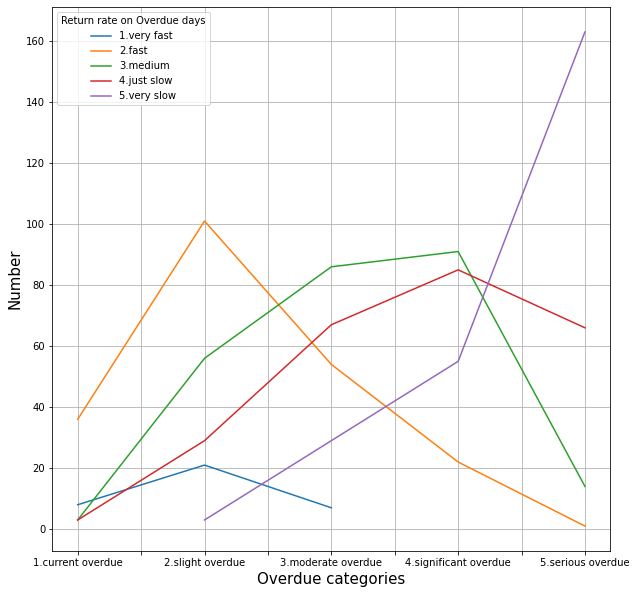

In [54]:
Return_on_overdue.plot(grid=True, figsize=(10, 10))
plt.xlabel("Overdue categories", fontsize=15)
plt.ylabel("Number", fontsize=15)
plt.legend(title='Return rate on Overdue days')
plt.show()
